# OneHot_Encoder_Module

In [365]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
# This will suppress all warnings
import warnings
warnings.filterwarnings('ignore')  

### Load the Data

In [368]:
data=pd.read_csv('data/homeprice_1.csv')
data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,61000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robbinsville,2600,575000


### One Hot Encoding

In [370]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [371]:
OE=OneHotEncoder(dtype=int)
ab=OE.fit_transform(data[['town']]).toarray()
ab

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [372]:
d=pd.DataFrame(ab,columns=['a','b','c'])
d

,a,b,c
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [373]:
data1=data.join(d)
data1

,town,area,price,a,b,c
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,61000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robbinsville,2600,575000,0,1,0


In [374]:
# remove town column
data1=data1.drop('town',axis=1)
data1.head()

,area,price,a,b,c
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,61000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0


### Spliting the Data into Multiple Inputs(X) & One Target(Y) variables

In [376]:
X=data1.drop('price',axis=1)
X.head()

,area,a,b,c
0,2600,1,0,0
1,3000,1,0,0
2,3200,1,0,0
3,3600,1,0,0
4,4000,1,0,0


In [377]:
Y=data1['price']
Y.head()

0    550000
1    565000
2     61000
3    680000
4    725000
Name: price, dtype: int64

### Spliting data into test data & train data

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 10
Testing set size: 3


### Linear Regression Modeling

In [381]:
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

### Predictions

In [383]:
y_pred=mlr.predict(x_test)
y_pred

array([692772.72727277, 534954.54545453, 605590.9090909 ])

### Model Coefficients and Intercept

In [385]:
print("Coefficient:",mlr.coef_) #m
print("Intercept:",mlr.intercept_) #C

Coefficient: [   112.72727273 -29439.39393939   7378.78787879  22060.60606061]
Intercept: 271303.0303029073


### Creating DataFrame to view Results

In [387]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

if len(y_test) == len(y_pred):
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(results_df)
else:
    print("Mismatch in the length of actual and predicted values")

Length of y_test: 3
Length of y_pred: 3
   Actual      Predicted
2   61000  692772.727273
3  680000  534954.545455
4  725000  605590.909091


### Performance Metrics for Regression Models: MAE, MSE, and RMSE

In [389]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

298742.42424244486
144811164600.56998
380540.6214854992


### Visualization of Actual & Predicted Values

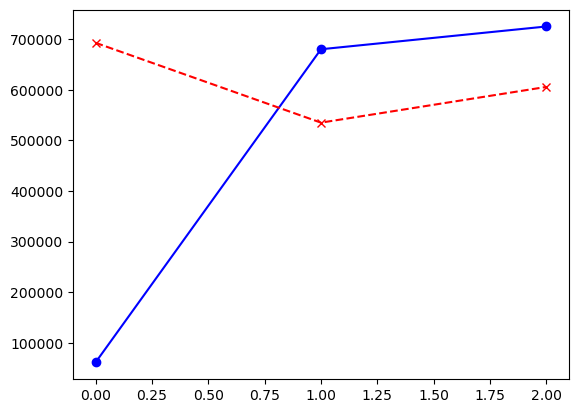

In [391]:
# Plotting actual values (y_test) with a line (blue)
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Values', linestyle='-', marker='o')

# Plotting predicted values (y_pred) with a line (red)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Values', linestyle='--', marker='x')


### r2 value calculations

In [393]:
r2=r2_score(y_test,y_pred)
r2

-0.5776889962559768

### Conclusion

In [395]:
print("\nConclusion:")
if r2 > 0.9:
    print(f"The model performs excellently with an R-squared value of {r2:.4f}. It explains over 90% of the variance in the target variable.")
else:
    print(f"The model's performance is moderate with an R-squared value of {r2:.4f}. Consider improving the model by adding more features or using more advanced techniques.")



Conclusion:
The model's performance is moderate with an R-squared value of -0.5777. Consider improving the model by adding more features or using more advanced techniques.


In [396]:
#END